# Load Modules

In [1]:
%matplotlib inline

from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.patheffects as path_effects
import numpy as np

# Function

In [2]:
def dipping_fault_patch(x0, line_dist, fault_z0, fault_thickness, fault_dip_degrees, facecolor='xkcd:gray', edgecolor='xkcd:black', **kwargs):
    fault_x0 = x0+(0.5*line_dist)+((0.5*fault_thickness)/np.tan(np.radians(fault_dip_degrees)))
    fault_x1 = x0+(0.5*line_dist)-((0.5*fault_thickness)/np.tan(np.radians(fault_dip_degrees)))
    fault_z1 = fault_z0+fault_thickness
    world_x0 = x0-(3*line_dist)
    world_z0 = 0
    world_x1 = line_dist+(3*line_dist)
    world_z1 = 2*fault_z1
    faults_vertices = np.array([[fault_x0, -fault_z0], [world_x1, -fault_z0], [world_x1, -fault_z1], [fault_x1, -fault_z1]])
    fault_patch = patches.Polygon(faults_vertices, closed=True, edgecolor=edgecolor, facecolor=facecolor, **kwargs)
    return fault_patch

def faulted_layer_patch(x0, line_dist, ground_z0, fault_z0, fault_thickness, fault_dip_degrees, upperlayerkwargs={'facecolor':'xkcd:light brown'},
                        lowerlayerkwargs={'facecolor':'xkcd:sky blue'}):
    fault_x0 = x0+(0.5*line_dist)+((0.5*fault_thickness)/np.tan(np.radians(fault_dip_degrees)))
    fault_x1 = x0+(0.5*line_dist)-((0.5*fault_thickness)/np.tan(np.radians(fault_dip_degrees)))
    fault_z1 = fault_z0+fault_thickness
    world_x0 = x0-(3*line_dist)
    world_z0 = 0
    world_x1 = line_dist+(3*line_dist)
    world_z1 = 2*fault_z1
    upper_layer = np.array([[world_x0, -ground_z0], [world_x1, -ground_z0], [world_x1, -fault_z0], [fault_x0, -fault_z0],\
                            [fault_x1, -fault_z1], [world_x0, -fault_z1]])
    upper_layer_patch = patches.Polygon(upper_layer, closed=True, **upperlayerkwargs)
    lower_layer = np.array([[world_x0, -fault_z1], [fault_x1, -fault_z1], [fault_x0, -fault_z0], [world_x1, -fault_z0],\
                            [world_x1, -world_z1], [world_x0, -world_z1]])
    lower_layer_patch = patches.Polygon(lower_layer, closed=True, **lowerlayerkwargs)
    # Combine patches into a compound patch
    patches_list = [lower_layer_patch, upper_layer_patch]
    # Create a PatchCollection
    world_patch = PatchCollection(patches_list, match_original=True)
    return world_patch

def dipping_dyke_patch(x0, line_dist, ground_z0, dyke_z0, dyke_thickness, dyke_dip_degrees, model_depth=None, world_bg=True,
                       bgkwargs={"facecolor":"white"}, dykekwargs={"facecolor":"red"}):
    world_x0 = x0-(3*line_dist)
    world_z0 = 0
    world_x1 = line_dist+(3*line_dist)
    if model_depth is None:
        world_z1 = 10*dyke_thickness
    else:
        world_z1 = model_depth
    dyke_x0 = x0+(0.5*line_dist)+(0.5*dyke_thickness) #upper right X
    dyke_x3 = x0+(0.5*line_dist)-(0.5*dyke_thickness) #upper left X
    dyke_x1 = dyke_x0+world_z1/np.tan(np.deg2rad(dyke_dip_degrees)) #lower right X
    Dx_1 = np.abs(dyke_x1 - dyke_x0)
    dyke_z1 = dyke_z0+Dx_1*np.tan(np.deg2rad(dyke_dip_degrees)) #lower right Z
    dyke_x2 = dyke_x3+world_z1/np.tan(np.deg2rad(dyke_dip_degrees)) #lower left X
    Dx_2 = np.abs(dyke_x2 - dyke_x3)
    dyke_z2 = dyke_z0+Dx_2*np.tan(np.deg2rad(dyke_dip_degrees)) #lower right Z
    if (dyke_x1>=world_x1)&(dyke_x2>=world_x1):
        Dx_1 = np.abs(dyke_x0-world_x1)
        dyke_z1 = dyke_z0 + Dx_1*np.tan(np.deg2rad(dyke_dip_degrees))
        Dx_2 = np.abs(dyke_x3-world_x1)
        dyke_z2 = dyke_z0 + Dx_2*np.tan(np.deg2rad(dyke_dip_degrees))
        dyke_vertices = np.array([[dyke_x3, -dyke_z0], [dyke_x0, -dyke_z0], [world_x1, -dyke_z1], [world_x1, -dyke_z2]])
        background_vertices = np.array([[world_x0, ground_z0],[world_x1, ground_z0],[world_x1, -dyke_z1],[dyke_x0, -dyke_z0],\
                                        [dyke_x3, -dyke_z0],[world_x1, -dyke_z2],[world_x1,-world_z1],[world_x0,-world_z1]])
    elif (dyke_x1>=world_x1)&(dyke_x2<world_x1):
        Dx_1 = np.abs(dyke_x0-world_x1)
        dyke_z1 = dyke_z0 + Dx_1*np.tan(np.deg2rad(dyke_dip_degrees))
        dyke_vertices = np.array([[dyke_x3, -dyke_z0], [dyke_x0, -dyke_z0], [world_x1, -dyke_z1], [world_x1, -world_z1], [dyke_x2, -world_z1]])
        background_vertices = np.array([[world_x0, ground_z0],[world_x1, ground_z0],[world_x1, -dyke_z1],[dyke_x0, -dyke_z0],\
                                        [dyke_x3, -dyke_z0],[dyke_x2, -world_z1],[world_x0,-world_z1]])
    elif (dyke_x1<=world_x0)&(dyke_x2<=world_x0):
        Dx_1 = np.abs(dyke_x3-world_x0)
        dyke_z1 = dyke_z0 + Dx_1*np.tan(np.deg2rad(abs(dyke_dip_degrees)))
        Dx_2 = np.abs(dyke_x0-world_x0)
        dyke_z2 = dyke_z0 + Dx_2*np.tan(np.deg2rad(abs(dyke_dip_degrees)))
        dyke_vertices = np.array([[world_x0, -dyke_z1], [dyke_x3, -dyke_z0], [dyke_x0, -dyke_z0], [world_x0, -dyke_z2]])
        background_vertices = np.array([[world_x0, ground_z0],[world_x1, ground_z0],[world_x1, -world_z1],[world_x0, -world_z1],\
                                        [world_x0, -dyke_z2],[dyke_x0, -dyke_z0],[dyke_x3, -dyke_z0],[world_x0, -dyke_z1]])
    elif (dyke_x1<=world_x0)&(dyke_x2>world_x0):
        Dx_1 = np.abs(dyke_x3-world_x0)
        dyke_z1 = dyke_z0 + Dx_1*np.tan(np.deg2rad(dyke_dip_degrees))
        dyke_vertices = np.array([[world_x0, -dyke_z1], [dyke_x3, -dyke_z0], [dyke_x0, -dyke_z0], [dyke_x1, -world_z1], [world_x0, -world_z1]])
        background_vertices = np.array([[world_x0, ground_z0],[world_x1, ground_z0],[world_x1, -world_z1],[dyke_x1, -world_z1],\
                                        [dyke_x0, -dyke_z0],[dyke_x3, -dyke_z0],[world_x0, -dyke_z1]])
    else:
        dyke_vertices = np.array([[dyke_x3, -dyke_z0], [dyke_x0, -dyke_z0], [dyke_x1, -world_z1], [dyke_x2, -world_z1]])
        background_vertices = np.array([[world_x0, ground_z0],[world_x1, ground_z0],[world_x1, -world_z1],[dyke_x1, -world_z1],\
                                        [dyke_x0, -dyke_z0],[dyke_x3, -dyke_z0],[dyke_x2, -world_z1],[world_x0, -world_z1]])
    if world_bg == True:
        background_patch = patches.Polygon(background_vertices, closed=True, **bgkwargs)
        dyke_patch = patches.Polygon(dyke_vertices, closed=True, **dykekwargs)
        # Combine patches into a compound patch
        patches_list = [dyke_patch, background_patch]
    else:
        dyke_patch = patches.Polygon(dyke_vertices, closed=True, **dykekwargs)
        patches_list = [dyke_patch]
    world_patch = PatchCollection(patches_list, match_original=True)
    return dyke_vertices, background_vertices, world_patch


# Plotting the dyke experiment

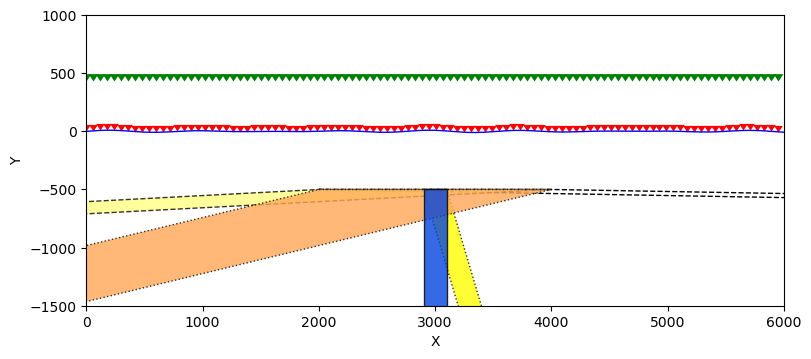

In [3]:
# Generate some data
mag_Z = 430
grav_Z = 0
freq_1 = 8e-3
freq_2 = 1e-3
ampli = 10
line_dist = 6000
x_loc = np.linspace(0,line_dist,500)
y_line = ampli*np.sin(freq_1*x_loc)*np.cos(freq_2*x_loc)
x_sampled = x_loc[::5]
y_line_sampled = ampli*np.sin(freq_1*x_sampled)*np.cos(freq_2*x_sampled)
y_grav = grav_Z + y_line_sampled
ground_z0 = 0
dyke1_dip_degrees = 1
dyke_depth = 500
dyke_thickness = 200
y_aero = mag_Z + np.zeros(x_sampled.shape)

# Create figure and axis
fig, ax = plt.subplots(1, 1, figsize=(9, 5))

# Plot line
ax.plot(x_loc, y_line, color='blue', label='Line', linewidth=1)

# Scatter plots
ax.scatter(x_sampled, y_grav, color='red', label='Scatter 1', marker=7, s=40, linewidths=0)
ax.scatter(x_sampled, y_aero, color='green', label='Scatter 2', marker=7, s=50, linewidths=0)

# Vertically slanted rectangle
dyke1_keywords = {"facecolor":"None","edgecolor":"xkcd:black","linestyle":"--","linewidth":1}
dippingdyke_1 = dipping_dyke_patch(0, line_dist, ground_z0, dyke_depth, 2000, dyke1_dip_degrees, model_depth=5000, world_bg=False,
                                   dykekwargs=dyke1_keywords)
dyke2_keywords = {"facecolor":"xkcd:pale yellow","edgecolor":"xkcd:black","linestyle":"--","linewidth":1,"alpha":0.8}
dippingdyke_2 = dipping_dyke_patch(0, line_dist, ground_z0, dyke_depth, 2000, -3, model_depth=5000, world_bg=False,
                                   dykekwargs=dyke2_keywords)
dyke3_keywords = {"facecolor":"xkcd:bright yellow","edgecolor":"xkcd:black","linestyle":"dotted","linewidth":1,"alpha":0.8}
dippingdyke_3 = dipping_dyke_patch(0, line_dist, ground_z0, dyke_depth, dyke_thickness, 75, model_depth=5000, world_bg=False,
                                   dykekwargs=dyke3_keywords)
dyke4_keywords = {"facecolor":"xkcd:pale orange","edgecolor":"xkcd:black","linestyle":"dotted","linewidth":1,"alpha":0.8}
dippingdyke_4 = dipping_dyke_patch(0, line_dist, ground_z0, dyke_depth, 2000, -15, model_depth=5000, world_bg=False,
                                   dykekwargs=dyke4_keywords)
dyke5_keywords = {"facecolor":"xkcd:blue","edgecolor":"xkcd:black","linestyle":"-","linewidth":1,"alpha":0.8}
dippingdyke_5 = dipping_dyke_patch(0, line_dist, ground_z0, dyke_depth, dyke_thickness, 90, model_depth=5000, world_bg=False,
                                   dykekwargs=dyke5_keywords)
ax.add_collection(dippingdyke_1[2])
ax.add_collection(dippingdyke_2[2])
ax.add_collection(dippingdyke_3[2])
ax.add_collection(dippingdyke_4[2])
ax.add_collection(dippingdyke_5[2])

# Set plot limits
ax.set_xlim(x_loc.min(), x_loc.max())
ax.set_ylim(-1.5e+3, 1e+3)

# Set labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')

# Plotting the fault experiment

Text(0, 0.5, 'Y')

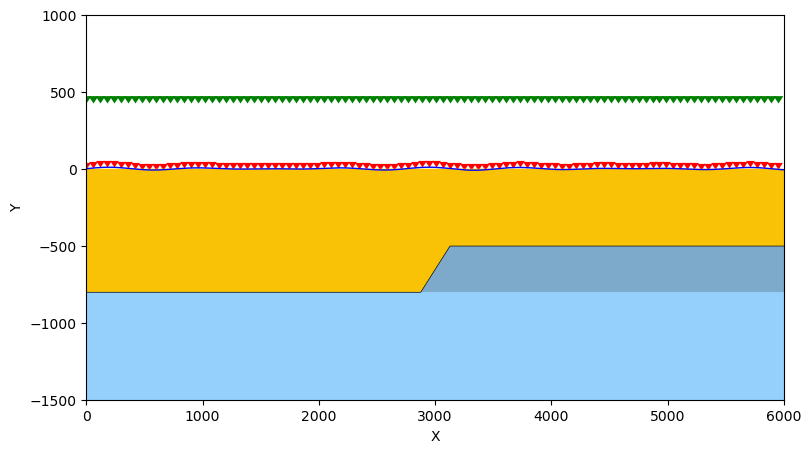

In [4]:
fault_depth = 500
fault_dip_degrees = 50
fault_offset = 300

# Create figure and axis
fig, ax = plt.subplots(1, 1, figsize=(9, 5))

# Plot line
ax.plot(x_loc, y_line, color='blue', label='Line', linewidth=1)

# Scatter plots
ax.scatter(x_sampled, y_grav, color='red', label='Scatter 1', marker=7, s=40, linewidths=0)
ax.scatter(x_sampled, y_aero, color='green', label='Scatter 2', marker=7, s=50, linewidths=0)

# Horizontal half trapezoid
fault_patch = dipping_fault_patch(0, line_dist, fault_depth, fault_offset, fault_dip_degrees, facecolor='xkcd:dark gray',
                                  edgecolor='xkcd:black', linewidth=0, alpha=0.25)
#trapezoid = patches.Polygon([[6000, -500], [10000, -500], [12000, -1500], [8000, -1500]], closed=True, edgecolor='purple', facecolor='none')
kwargs_upper = {'facecolor':'xkcd:goldenrod', 'linewidth':0}
kwargs_lower = {'facecolor':'xkcd:light blue', 'edgecolor':'black', 'linewidth':1}
faulted_layer = faulted_layer_patch(0, line_dist, ground_z0, fault_depth, fault_offset, fault_dip_degrees, upperlayerkwargs=kwargs_upper,
                                    lowerlayerkwargs=kwargs_lower)
ax.add_collection(faulted_layer)
ax.add_patch(fault_patch)

# Set plot limits
ax.set_xlim(x_loc.min(), x_loc.max())
ax.set_ylim(-1.5e+3, 1e+3)

# Set labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')